In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# #reading the data 
# #data_nan = pd.read_csv('C:/Users/teddi/OneDrive/Desktop/Traffic_Violations.csv', low_memory = False)
data = pd.read_csv('C:/Users/teddi/OneDrive/Desktop/Traffic_Violations.csv', low_memory = False)
# data_nan = data_nan.head(500)
# # data_Personal_Injury = data_nan['Personal Injury']
# # data_belts = data_nan['Belts']
# # data_belts.drop_duplicates()
# # with_belts = data_nan.loc[data_nan["Belts"] == 'Yes'] 
# # with_accident = data_nan.loc[data_nan["Alcohol"] == 'Yes'] 
# Male_cases = data_nan.loc[data_nan['Gender'] == 'M'].head(343568)
# Male_cases
# Female_cases = data_nan.loc[data_nan['Gender'] == 'F'].head(343568)
# Female_cases
# #Female_cases.loc[Female_cases['Contributed To Accident'] == 'Yes']
# Male_cases.loc[Male_cases['Contributed To Accident'] == 'Yes']
# list(data)

['Date Of Stop',
 'Time Of Stop',
 'Agency',
 'SubAgency',
 'Description',
 'Location',
 'Latitude',
 'Longitude',
 'Accident',
 'Belts',
 'Personal Injury',
 'Property Damage',
 'Fatal',
 'Commercial License',
 'HAZMAT',
 'Commercial Vehicle',
 'Alcohol',
 'Work Zone',
 'State',
 'VehicleType',
 'Year',
 'Make',
 'Model',
 'Color',
 'Violation Type',
 'Charge',
 'Article',
 'Contributed To Accident',
 'Race',
 'Gender',
 'Driver City',
 'Driver State',
 'DL State',
 'Arrest Type',
 'Geolocation']

In [6]:
#removing all rows with missing values and all values outside of the years 1985 and 2000
data = data.dropna().reset_index(drop=True)
data = data[(2005 <= data['Year']) & (data['Year'] <= 2020)]

print(data.shape[0])
data.head(5)

569352


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
4,02/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,...,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"
7,12/20/2012,0:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,...,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
9,9/11/2012,21:47:00,MCP,"4th district, Wheaton",PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,TWIG RD AT GOOD HOPE RD,39.096199,-76.986962,No,Yes,...,16-303(d),Transportation Article,No,BLACK,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.09619885, -76.98696215)"
12,12/17/2015,13:15:00,MCP,"5th district, Germantown",FAILURE TO RETURN TO & REMAIN AT SCENE OF ACCI...,19916 CRYSTAL ROCK DR,39.222793,-77.253690,No,No,...,20-103(b),Transportation Article,No,BLACK,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.2227933333333, -77.25369)"
15,08/29/2017,1:56:00,MCP,"6th district, Gaithersburg / Montgomery Village",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,KENTLANDS BLVD@GREAT SENECA HWY,39.123242,-77.232998,No,No,...,16-101(a),Transportation Article,No,HISPANIC,M,CLARKSBURG,MD,MD,A - Marked Patrol,"(39.1232416666667, -77.2329983333333)"


In [7]:
#the value count for each car model and storing in a numpy array 
numbers_np = data["Model"].value_counts().to_numpy()


#get the names (the .index gets the names instead of the values)
names_np = data['Model'].value_counts().index.to_numpy()


names_to_turn_to_other = []

#turn any Model with less than 2000 value count into other -> reduces the number of unique inputs
for i in range(len(numbers_np)):
    if numbers_np[i] <= 2000:
        names_to_turn_to_other.append(names_np[i])

rows_to_remove = data[data.Model.isin(names_to_turn_to_other)].index
rows_list = rows_to_remove.tolist()
data.loc[rows_list, 'Model'] = 'Others'

#now there should only be 14 unique car models. 
print(data["Model"].unique().shape[0])

47


In [8]:
#dropping any column with more than 500 unique inputs
columns_to_drop = []
for i in range(data.shape[1]):
    if data[data.columns[i]].unique().shape[0] > 500:
        columns_to_drop.append(data.columns[i])
        print(data.columns[i])

print(columns_to_drop)
data.drop(columns_to_drop, axis = 1, inplace=True)

Date Of Stop
Time Of Stop
Description
Location
Latitude
Longitude
Make
Charge
Driver City
Geolocation
['Date Of Stop', 'Time Of Stop', 'Description', 'Location', 'Latitude', 'Longitude', 'Make', 'Charge', 'Driver City', 'Geolocation']


In [9]:
encoder = LabelEncoder()

#label encoding each of the columns
data['Contributed To Accident'] = encoder.fit_transform(data['Contributed To Accident'])
data['Personal Injury'] = encoder.fit_transform(data['Personal Injury'])
data['Alcohol'] = encoder.fit_transform(data['Alcohol'])

model_columns = pd.get_dummies(data['Model'])
#category_columns = category_columns.drop(['Van'], axis = 'columns')
data.drop(['Model'], axis = 1, inplace = True)
data = data.join(model_columns)




list(data)

['Agency',
 'SubAgency',
 'Accident',
 'Belts',
 'Personal Injury',
 'Property Damage',
 'Fatal',
 'Commercial License',
 'HAZMAT',
 'Commercial Vehicle',
 'Alcohol',
 'Work Zone',
 'State',
 'VehicleType',
 'Year',
 'Color',
 'Violation Type',
 'Article',
 'Contributed To Accident',
 'Race',
 'Gender',
 'Driver State',
 'DL State',
 'Arrest Type',
 '2S',
 '3',
 '300',
 '4D',
 '4DR',
 '4S',
 'ACCORD',
 'ALTIMA',
 'CAMRY',
 'CHARGER',
 'CIVIC',
 'COROLLA',
 'CRV',
 'ELANTRA',
 'ESCAPE',
 'EXPLORER',
 'F150',
 'FOCUS',
 'FUSION',
 'HIGHLANDER',
 'IMPALA',
 'JETTA',
 'MALIBU',
 'MAXIMA',
 'MDX',
 'MUSTANG',
 'ODYSSEY',
 'Others',
 'PILOT',
 'PRIUS',
 'RAV4',
 'ROGUE',
 'SENTRA',
 'SIENNA',
 'SILVERADO',
 'SONATA',
 'SU',
 'SUV',
 'SW',
 'TACOMA',
 'TK',
 'TL',
 'TRUCK',
 'TSX',
 'VAN',
 'VERSA',
 'VN']

In [10]:
contributed = data.loc[data['Contributed To Accident'] == 1]
not_contributed = data.loc[data['Contributed To Accident'] == 0]

print(contributed.shape[0])
print(not_contributed.shape[0])

not_contributed = not_contributed.drop(not_contributed.sample(not_contributed.shape[0]-contributed.shape[0]).index)
print(contributed.shape[0])
print(not_contributed.shape[0])
data = pd.concat([contributed, not_contributed], ignore_index=True)

without_alcohol = data.loc[data["Alcohol"] == 0] 
with_alcohol = data.loc[data["Alcohol"] == 1] 

print(with_alcohol.shape[0])
print(without_alcohol.shape[0])

without_alcohol = without_alcohol.drop(without_alcohol.sample(without_alcohol.shape[0]-with_alcohol.shape[0]).index)
print(with_alcohol.shape[0])
print(without_alcohol.shape[0])
data = pd.concat([with_alcohol, without_alcohol], ignore_index=True)


contributed = data.loc[data['Contributed To Accident'] == 1]
not_contributed = data.loc[data['Contributed To Accident'] == 0]

print(contributed.shape[0])
print(not_contributed.shape[0])

contributed = contributed.drop(contributed.sample(contributed.shape[0]-not_contributed.shape[0]).index)
print(contributed.shape[0])
print(not_contributed.shape[0])
data = pd.concat([contributed, not_contributed], ignore_index=True)

print(with_alcohol.loc[with_alcohol['Contributed To Accident'] == 1].shape[0]/without_alcohol.loc[without_alcohol['Contributed To Accident'] == 1].shape[0])


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


#test train ratio in percentage
#by including it it the loop statement,
#we can easily repeat code at different values
five_train_test_ratios = 1

#This will collect recorded accuracies
list_accuracy1 = []
while five_train_test_ratios <= 5:
  average_accuracy = 0
  j = 0
  while j < 20:

    #data_train, data_test = train_test_split(data, test_size=five_train_test_ratios/10)
    df_train, df_test = train_test_split(data, test_size = 0.3)

    x_train = df_train[['Alcohol']].to_numpy()
    #x_train = df_train[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_train = data_train["Personal Injury"].to_numpy()
    y_train = df_train['Contributed To Accident'].to_numpy()
    
    x_test = df_test[['Alcohol']].to_numpy()
    #x_test = df_test[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_test = data_test["Personal Injury"].to_numpy()
    y_test = df_test['Contributed To Accident'].to_numpy()

    model = GaussianNB()
    fit = model.fit(x_train, y_train)

    y_pred = fit.predict(x_test)
    average_accuracy += accuracy_score(y_test, y_pred)
    j = j + 1

  average_accuracy = average_accuracy/20
  list_accuracy1.append(average_accuracy)
  five_train_test_ratios = five_train_test_ratios + 1
print(list_accuracy1)
max(list_accuracy1)
print(y_test)
print(y_pred)




14015
555337
14015
14015
64
27966
64
64
78
50
50
50
1.1081081081081081
[0.4333333333333334, 0.4183333333333333, 0.42666666666666675, 0.44000000000000006, 0.43000000000000005]
[0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1]
[0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0]


In [11]:
five_train_test_ratios = 1

#This will collect recorded accuracies
list_accuracy2 = []
while five_train_test_ratios <= 5:
  average_accuracy = 0
  j = 0
  while j < 20:

    #data_train, data_test = train_test_split(data, test_size=five_train_test_ratios/10)
    df_train, df_test = train_test_split(data, test_size = 0.3)

    x_train = df_train[['Alcohol']].to_numpy()
    #x_train = df_train[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_train = data_train["Personal Injury"].to_numpy()
    y_train = df_train['Contributed To Accident'].to_numpy()
    
    x_test = df_test[['Alcohol']].to_numpy()
    #x_test = df_test[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_test = data_test["Personal Injury"].to_numpy()
    y_test = df_test['Contributed To Accident'].to_numpy()

    model = LogisticRegression()
    #model = GaussianNB()
    fit = model.fit(x_train, y_train)

    y_pred = fit.predict(x_test)
    average_accuracy += accuracy_score(y_test, y_pred)
    j = j + 1

  average_accuracy = average_accuracy/20
  list_accuracy2.append(average_accuracy)
  five_train_test_ratios = five_train_test_ratios + 1
print(list_accuracy2)
max(list_accuracy2)
print(y_test)
print(y_pred)

[0.4116666666666668, 0.44000000000000006, 0.43833333333333335, 0.4133333333333334, 0.4000000000000001]
[1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1]
[1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1]


In [12]:
from sklearn.neural_network import MLPClassifier
five_train_test_ratios = 1

#This will collect recorded accuracies
list_accuracy3 = []
while five_train_test_ratios <= 5:
  average_accuracy = 0
  j = 0
  while j < 20:

    #data_train, data_test = train_test_split(data, test_size=five_train_test_ratios/10)
    df_train, df_test = train_test_split(data, test_size = 0.3)

    x_train = df_train[['Alcohol']].to_numpy()
    #x_train = df_train[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_train = data_train["Personal Injury"].to_numpy()
    y_train = df_train['Contributed To Accident'].to_numpy()
    
    x_test = df_test[['Alcohol']].to_numpy()
    #x_test = df_test[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_test = data_test["Personal Injury"].to_numpy()
    y_test = df_test['Contributed To Accident'].to_numpy()

    neuron_amount = five_train_test_ratios*4
    model = MLPClassifier(random_state = 1, hidden_layer_sizes = (neuron_amount, ))
    fit = model.fit(x_train, y_train)

    y_pred = fit.predict(x_test)
    average_accuracy += accuracy_score(y_test, y_pred)
    j = j + 1

  average_accuracy = average_accuracy/20
  list_accuracy3.append(average_accuracy)
  five_train_test_ratios = five_train_test_ratios + 1
print(list_accuracy3)
max(list_accuracy3)
print(y_test)
print(y_pred)

C:\Users\teddi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\teddi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\teddi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\teddi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\teddi\anaconda3\lib\site-packages\sklearn\neural_network\_multi

[0.5166666666666666, 0.51, 0.44333333333333347, 0.4416666666666667, 0.44499999999999995]
[0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0]
[0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1]


In [13]:
'Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN'
without_alcohol = data.loc[data["Alcohol"] == 0] 
with_alcohol = data.loc[data["Alcohol"] == 1]

print(with_alcohol.loc[with_alcohol['2S'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['4D'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['4DR'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['4S'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['ACCORD'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['CAMRY'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['CIVIC'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['COROLLA'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['EXPLORER'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['MAXIMA'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['Others'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['TK'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['VAN'] == 1].shape[0])
print(with_alcohol.loc[with_alcohol['VN'] == 1].shape[0])

print()

print(data.loc[data['2S'] == 1].shape[0])
print(data.loc[data['4D'] == 1].shape[0])
print(data.loc[data['4DR'] == 1].shape[0])
print(data.loc[data['4S'] == 1].shape[0])
print(data.loc[data['ACCORD'] == 1].shape[0])
print(data.loc[data['CAMRY'] == 1].shape[0])
print(data.loc[data['CIVIC'] == 1].shape[0])
print(data.loc[data['COROLLA'] == 1].shape[0])
print(data.loc[data['EXPLORER'] == 1].shape[0])
print(data.loc[data['MAXIMA'] == 1].shape[0])
print(data.loc[data['Others'] == 1].shape[0])
print(data.loc[data['TK'] == 1].shape[0])
print(data.loc[data['VAN'] == 1].shape[0])
print(data.loc[data['VN'] == 1].shape[0])

0
0
0
0
12
0
1
0
1
0
22
1
2
1

1
0
0
3
13
0
1
1
2
0
49
4
3
1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


personal_injury = data.loc[data['Personal Injury'] == 1]
no_personal_injury = data.loc[data['Personal Injury'] == 0]

print(personal_injury.shape[0])
print(no_personal_injury.shape[0])

no_personal_injury = no_personal_injury.drop(no_personal_injury.sample(no_personal_injury.shape[0]-personal_injury.shape[0]).index)
print(personal_injury.shape[0])
print(no_personal_injury.shape[0])
data = pd.concat([personal_injury, no_personal_injury], ignore_index=True)



#test train ratio in percentage
#by including it it the loop statement,
#we can easily repeat code at different values
five_train_test_ratios = 1

#This will collect recorded accuracies
list_accuracy1 = []
while five_train_test_ratios <= 5:
  average_accuracy = 0
  j = 0
  while j < 20:

    #data_train, data_test = train_test_split(data, test_size=five_train_test_ratios/10)
    df_train, df_test = train_test_split(data, test_size = 0.3)

    x_train = df_train[['Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN']].to_numpy()
    #x_train = df_train[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_train = data_train["Personal Injury"].to_numpy()
    y_train = df_train['Personal Injury'].to_numpy()
    
    x_test = df_test[['Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN']].to_numpy()
    #x_test = df_test[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_test = data_test["Personal Injury"].to_numpy()
    y_test = df_test['Personal Injury'].to_numpy()

    #model = LogisticRegression()
    model = GaussianNB()

    fit = model.fit(x_train, y_train)

    y_pred = fit.predict(x_test)
    average_accuracy += accuracy_score(y_test, y_pred)
    j = j + 1

  average_accuracy = average_accuracy/20
  list_accuracy1.append(average_accuracy)
  five_train_test_ratios = five_train_test_ratios + 1
  model_predicted = fit.predict(x_test)
  model_probability = fit.predict_proba(x_test)
print('The average Gaussian regression tested accuracy of 100 random test splits is: '+str(sum(list_accuracy1)/5))





12
88
12
12
The average Gaussian regression tested accuracy of 100 random test splits is: 0.62


4


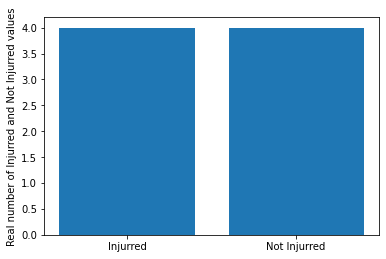

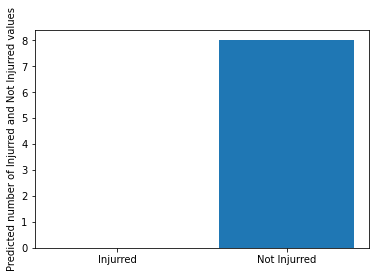

In [15]:
y_test_Injurred = y_test[y_test == 0]
y_test_Not_Injurred = y_test[y_test == 1]
#H = not_injurred

# y_test_P.shape[]
pred_Not_injurred = model_predicted[model_predicted == 1]
pred_Injurred = model_predicted[model_predicted == 0]

print(y_test_Not_Injurred.shape[0])

plt.bar(["Injurred", "Not Injurred"],[y_test_Injurred.shape[0],y_test_Not_Injurred.shape[0]])
plt.ylabel("Real number of Injurred and Not Injurred values")

plt.show()
plt.bar(["Injurred", "Not Injurred"], [pred_Injurred.shape[0],pred_Not_injurred.shape[0]])
plt.ylabel("Predicted number of Injurred and Not Injurred values")
plt.show()

In [16]:
five_train_test_ratios = 1

#This will collect recorded accuracies
list_accuracy2 = []
while five_train_test_ratios <= 5:
  average_accuracy = 0
  j = 0
  while j < 20:

    #data_train, data_test = train_test_split(data, test_size=five_train_test_ratios/10)
    df_train, df_test = train_test_split(data, test_size = 0.3)

    x_train = df_train[['Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN']].to_numpy()
    #x_train = df_train[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_train = data_train["Personal Injury"].to_numpy()
    y_train = df_train['Personal Injury'].to_numpy()
    
    x_test = df_test[['Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN']].to_numpy()
    #x_test = df_test[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_test = data_test["Personal Injury"].to_numpy()
    y_test = df_test['Personal Injury'].to_numpy()

    model = LogisticRegression()

    fit = model.fit(x_train, y_train)

    y_pred = fit.predict(x_test)
    average_accuracy += accuracy_score(y_test, y_pred)
    j = j + 1

  average_accuracy = average_accuracy/20
  list_accuracy2.append(average_accuracy)
  five_train_test_ratios = five_train_test_ratios + 1
  model_predicted = fit.predict(x_test)
  model_probability = fit.predict_proba(x_test)
print(list_accuracy2)
print('The average Logistic Regression tested accuracy of 100 random test splits is: '+str(sum(list_accuracy2)/5))


C:\Users\teddi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.44375, 0.35625, 0.45625, 0.39375, 0.4625]
The average Logistic Regression tested accuracy of 100 random test splits is: 0.42250000000000004


4


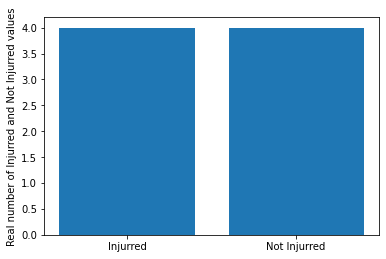

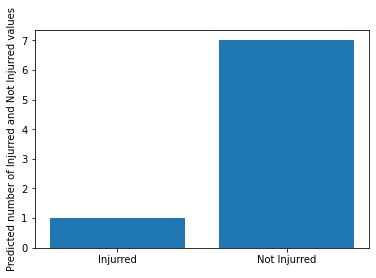

In [17]:
y_test_Injurred = y_test[y_test == 0]
y_test_Not_Injurred = y_test[y_test == 1]
#H = not_injurred

# y_test_P.shape[]
pred_Not_injurred = model_predicted[model_predicted == 1]
pred_Injurred = model_predicted[model_predicted == 0]

print(y_test_Not_Injurred.shape[0])

plt.bar(["Injurred", "Not Injurred"],[y_test_Injurred.shape[0],y_test_Not_Injurred.shape[0]])
plt.ylabel("Real number of Injurred and Not Injurred values")

plt.show()
plt.bar(["Injurred", "Not Injurred"], [pred_Injurred.shape[0],pred_Not_injurred.shape[0]])
plt.ylabel("Predicted number of Injurred and Not Injurred values")
plt.show()

In [18]:
from sklearn.neural_network import MLPClassifier

five_train_test_ratios = 1

#This will collect recorded accuracies
list_accuracy3 = []
while five_train_test_ratios <= 5:
  average_accuracy = 0
  j = 0
  while j < 20:

    #data_train, data_test = train_test_split(data, test_size=five_train_test_ratios/10)
    df_train, df_test = train_test_split(data, test_size = 0.3)

    x_train = df_train[['Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN']].to_numpy()
    #x_train = df_train[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_train = data_train["Personal Injury"].to_numpy()
    y_train = df_train['Personal Injury'].to_numpy()
    
    x_test = df_test[['Year', '2S', '4D', '4DR', '4S', 'ACCORD', 'CAMRY', 'CIVIC', 'COROLLA', 'EXPLORER', 'MAXIMA', 'Others', 'TK', 'VAN', 'VN']].to_numpy()
    #x_test = df_test[['Charge', 'State', 'SubAgency', 'Violation Type']].to_numpy()

    #y_test = data_test["Personal Injury"].to_numpy()
    y_test = df_test['Personal Injury'].to_numpy()

    neuron_amount = five_train_test_ratios*4
    model = MLPClassifier(random_state = 1, hidden_layer_sizes = (neuron_amount, ))
    fit = model.fit(x_train, y_train)


    y_pred = fit.predict(x_test)
    average_accuracy += accuracy_score(y_test, y_pred)
    j = j + 1

  average_accuracy = average_accuracy/20
  list_accuracy3.append(average_accuracy)
  five_train_test_ratios = five_train_test_ratios + 1
  model_predicted = fit.predict(x_test)
  model_probability = fit.predict_proba(x_test)
print(list_accuracy3)
max(list_accuracy3)
print('The average Multilayer Perceptron tested accuracy of 100 random test splits is: '+str(sum(list_accuracy3)/5))

[0.425, 0.475, 0.48125, 0.4875, 0.3875]
The average Multilayer Perceptron tested accuracy of 100 random test splits is: 0.45125000000000004


6


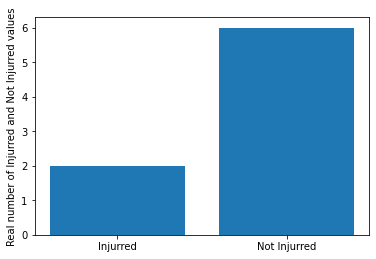

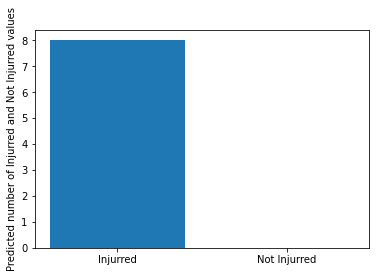

In [19]:
y_test_Injurred = y_test[y_test == 0]
y_test_Not_Injurred = y_test[y_test == 1]
#H = not_injurred

# y_test_P.shape[]
pred_Not_injurred = model_predicted[model_predicted == 1]
pred_Injurred = model_predicted[model_predicted == 0]

print(y_test_Not_Injurred.shape[0])

plt.bar(["Injurred", "Not Injurred"],[y_test_Injurred.shape[0],y_test_Not_Injurred.shape[0]])
plt.ylabel("Real number of Injurred and Not Injurred values")

plt.show()
plt.bar(["Injurred", "Not Injurred"], [pred_Injurred.shape[0],pred_Not_injurred.shape[0]])
plt.ylabel("Predicted number of Injurred and Not Injurred values")
plt.show()

The average Gaussian regression tested accuracy of 100 random test splits is: 0.62
The average Logistic Regression tested accuracy of 100 random test splits is: 0.42250000000000004
The average Multilayer Perceptron tested accuracy of 100 random test splits is: 0.45125000000000004


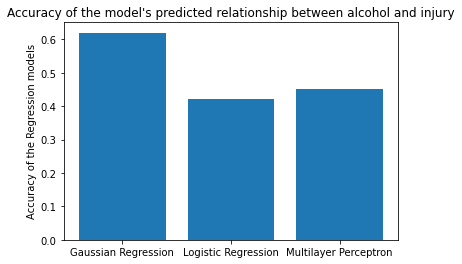

In [20]:
print('The average Gaussian regression tested accuracy of 100 random test splits is: '+str(sum(list_accuracy1)/5))
print('The average Logistic Regression tested accuracy of 100 random test splits is: '+str(sum(list_accuracy2)/5))
print('The average Multilayer Perceptron tested accuracy of 100 random test splits is: '+str(sum(list_accuracy3)/5))
plt.bar(["Gaussian Regression", "Logistic Regression", "Multilayer Perceptron"],[sum(list_accuracy1)/5, sum(list_accuracy2)/5, sum(list_accuracy3)/5])
plt.ylabel("Accuracy of the Regression models")
plt.title("Accuracy of the model's predicted relationship between alcohol and injury")
plt.show()

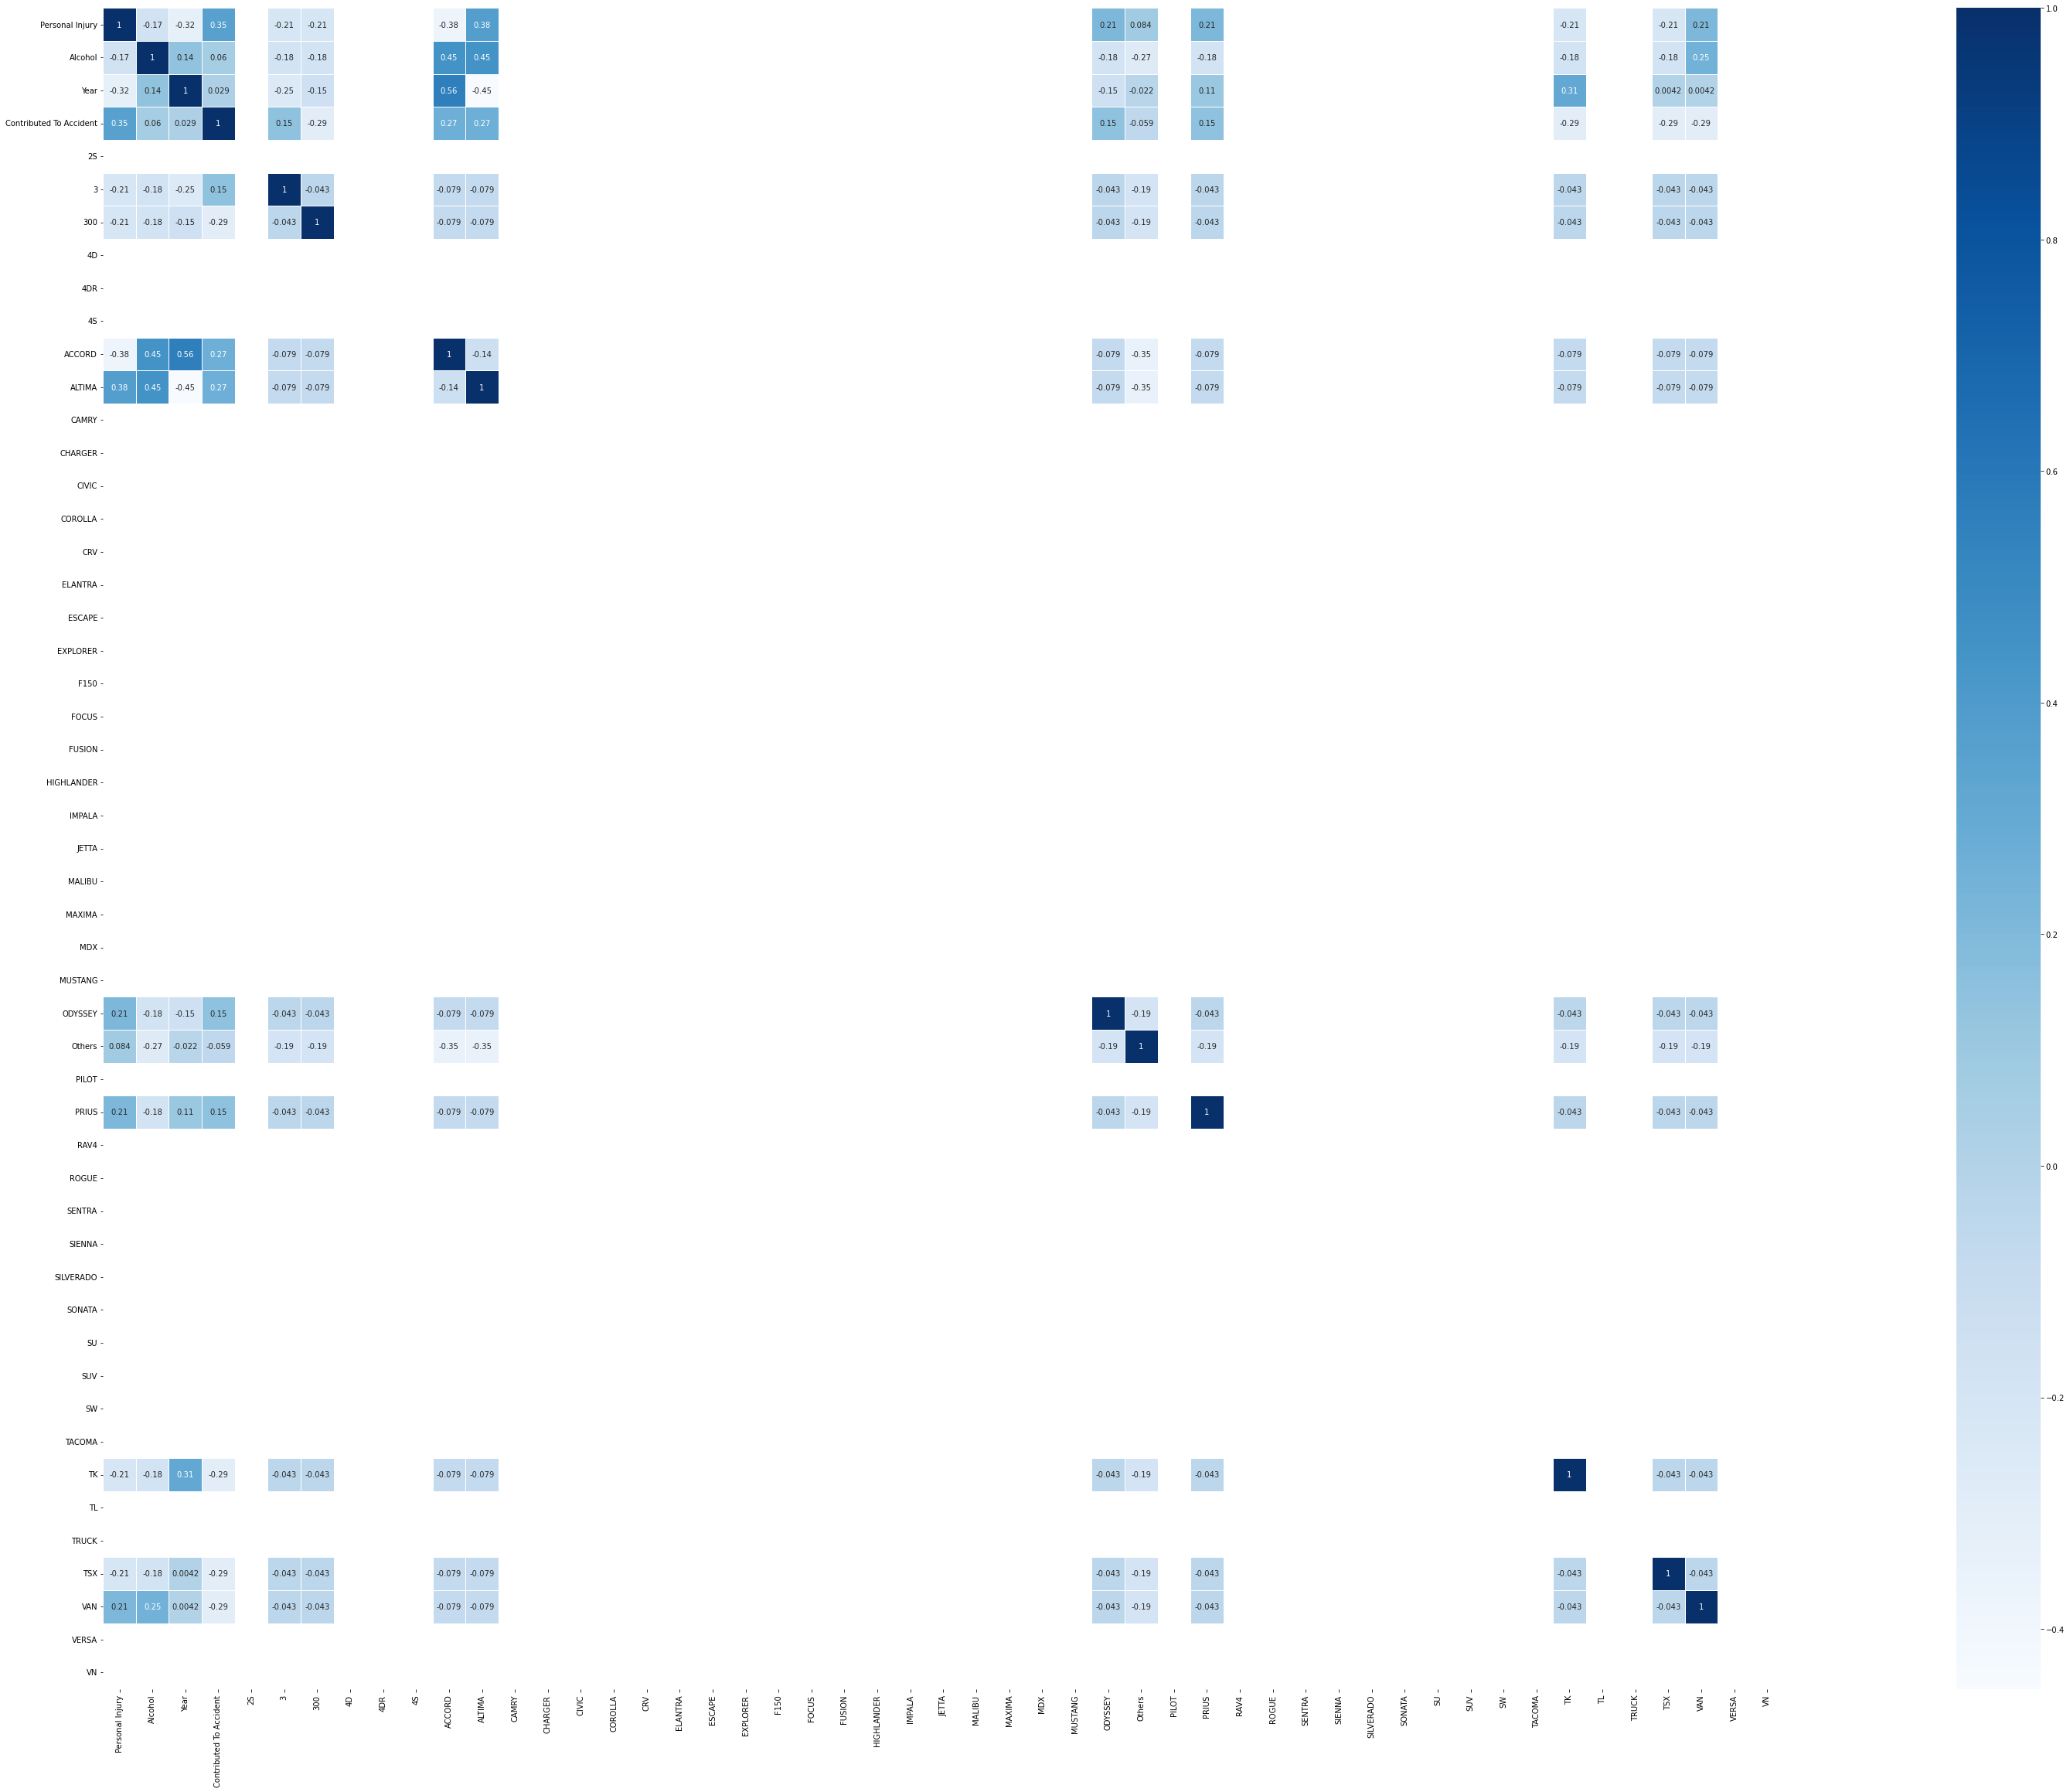

In [21]:
import seaborn as sns 

corrmatrix = data.corr()

plt.figure(figsize = (80,40))
sns.heatmap(corrmatrix, cmap = "Blues", square = True, linewidths=.5,annot=True)
plt.show()

In [22]:
data_fatality = data.loc[data['Fatal'] == 'Yes']
names = list(data_fatality['Model'].unique())
model_columns = pd.get_dummies(data_fatality['Model'])
#category_columns = category_columns.drop(['Van'], axis = 'columns')
data_fatality.drop(['Model'], axis = 1, inplace = True)
data_fatality = data_fatality.join(model_columns)
names
i = 0
another_list = []
while i < len(names):
  another_list.append(data_fatality.loc[data_fatality[names[i]] == 1].shape[0])
  i += 1

plt.figure(figsize = (60,30))
plt.bar(names, another_list)
plt.ylabel("Amount of fatalities")
plt.show()

KeyError: 'Model'